**Supervised Learning (Nazorat ostida)**

**Regressiya** (o'garuvchilar o'rtasida bog'liqlik)

• Bashorat (prognoz): iqlim, narx-navo, aholi soni, dollar kursi va hokazo

• Baholash: parametrlarga qarab uy, mashina, yerni baholash

Algorithm list /content/inbox-2175703-848ab2e9c24f3108c490b06b9c2819bf-Regression.jpg![1*R6Rbcks-pGO0SkhCINrP0g.png](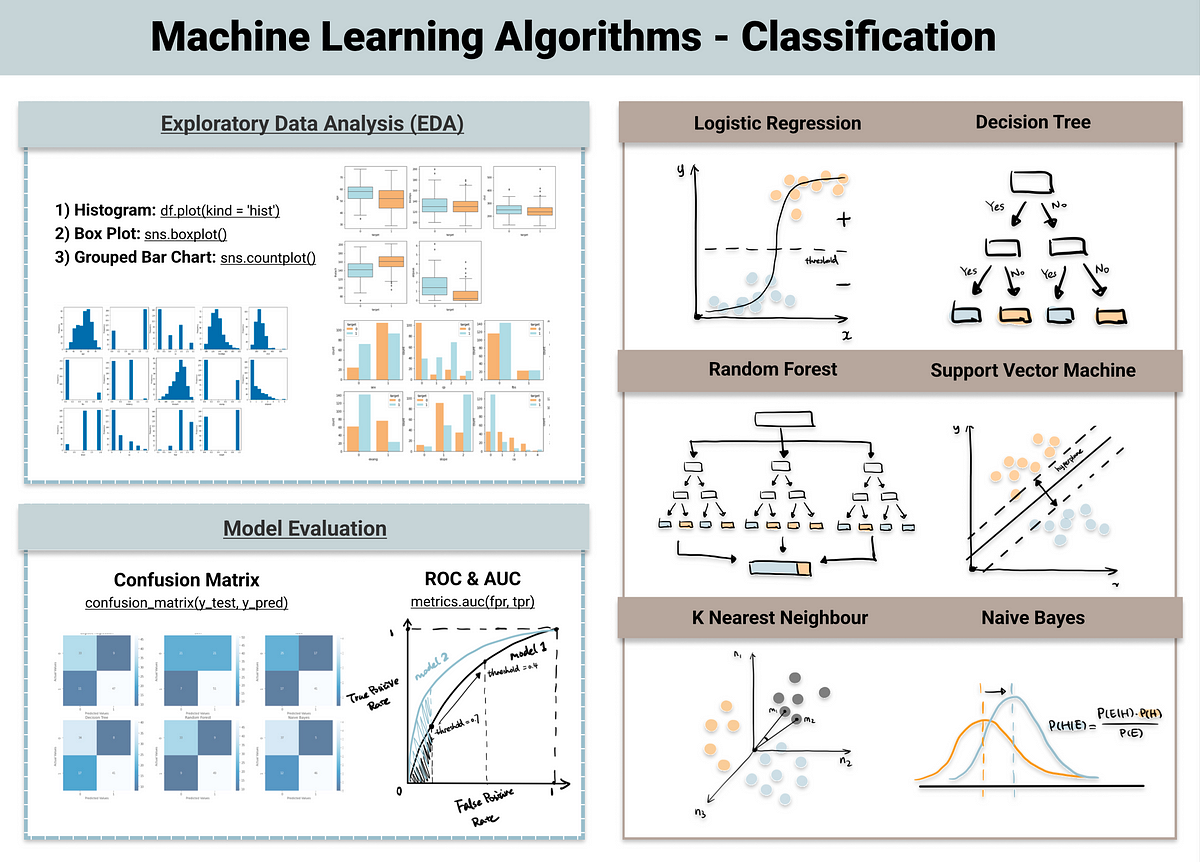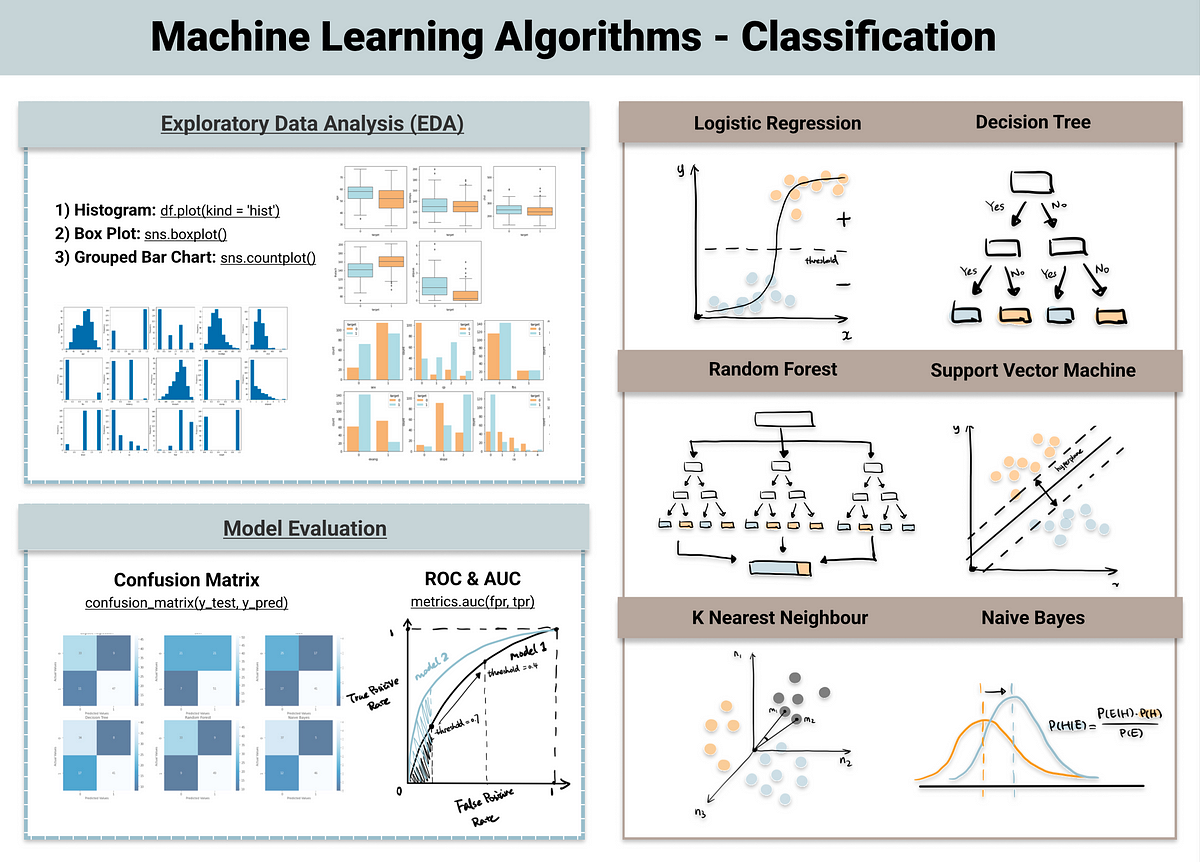)

**Klassifikasiya**

• Diagnostika

• Tasvirlarni ajratish

• Firibgarlikni aniqlash

• Mijozlarni saqlab qolish

**Simple Regression** -> Simple Linear Regression \ Simple non-Linear Regression

**Multiple Regression** -> Simple Multiple Regression \ Simple non-Multiple Regression

# **Linear Regression**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)

housing = df[df.district=='Чиланзарский']

X = housing['size'].to_numpy()
y = housing['price'].to_numpy()

Size va Price ustunlari orasidagi bog'liqlikni grafikga ko'ramiz

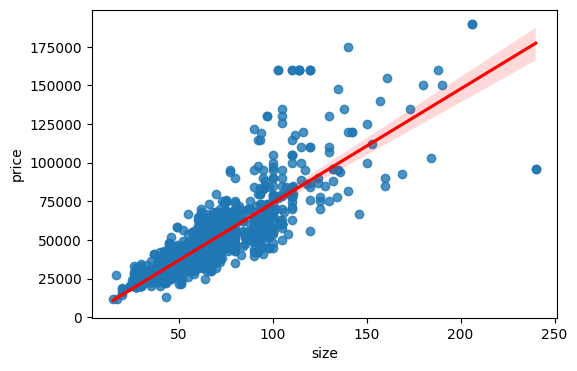

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(6,4))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

Linear regression formulasidagi theta1 va theta0 ni hisoblash

In [ ]:
# Saqlangan rasmni ochish
from IPython.display import Image
Image(url='https://i.imgur.com/zZoXZxI.png',height=200)

In [ ]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta0 = ymean - theta1*Xmean
print(f"{theta0=}")

theta1=740.0264822713287
theta0=-195.94911352690542


In [ ]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])
y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


RMSE (root mean square error), MAE (mean absolute error)

In [ ]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

MAE=4140.35031634715
RMSE=5882.051673173715


**Scikit-learn yordamida LR**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


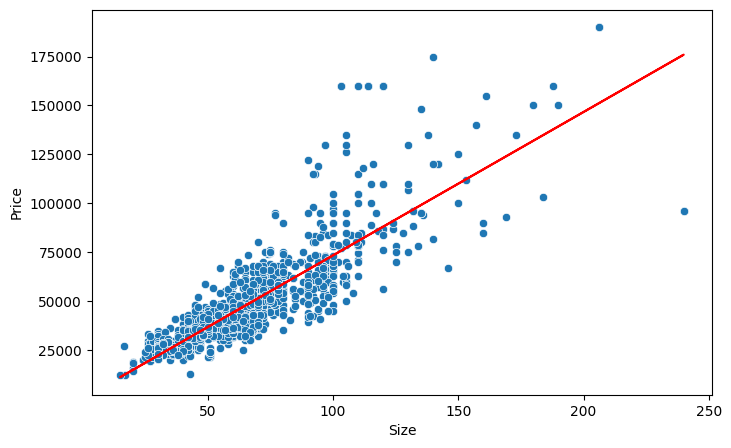

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

Modelni baholash

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

y_predict = LR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7269.709648262382
RMSE=12734.803748258666


## **Multiple Linear Regression**

Ishlatilishi:

1. Qaysi parametrlar muhimligini aniqlash

2. Parametlar o'zgarishining tasirini aniqlash uchun

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)

housing = df[df.district=='Чиланзарский']
housing.head()

# train/test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
# x_train = np.asanyarray(train_set[['rooms','size','level','max_levels']])
x_train = np.asanyarray(train_set[['size','max_levels']]) # bir nechta ustun olinsa bu Multiple LR
y_train = np.asanyarray(train_set[['price']])
MLR_model.fit (x_train, y_train)
# Koeffisientlar (theta1, theta2, ...)
print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_)

Coefficients:  [[ 747.04795007 -393.4032521 ]]
theta0: [1341.57534414]


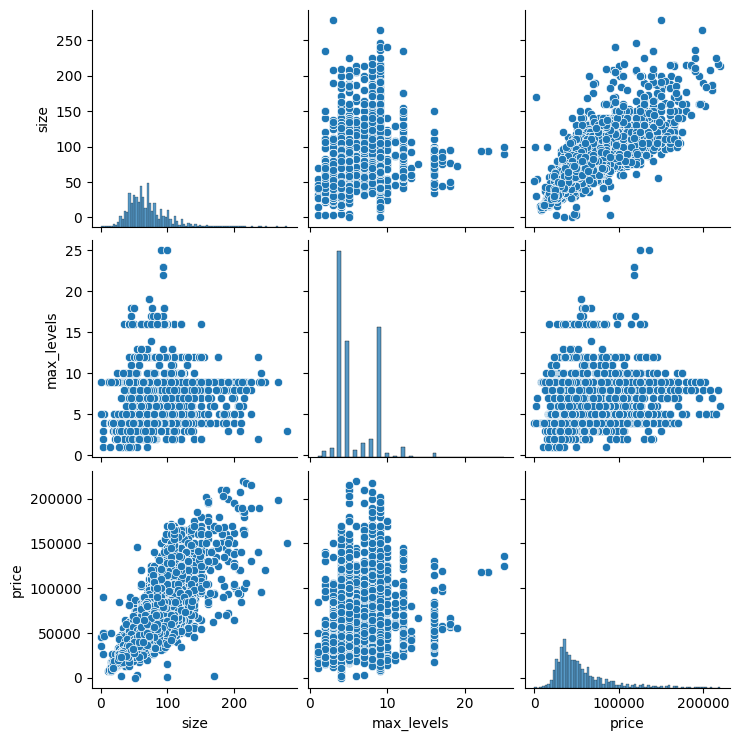

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df[['size','max_levels','price']]) # bog'liqlikni ko'rish uchun grafik
plt.show()

In [ ]:
# x_test = np.asanyarray(test_set[['rooms','size','level','max_levels']])
x_test = np.asanyarray(test_set[['size','max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7193.9223780657785
RMSE=12635.660248895361


## **Polynomial Regression**

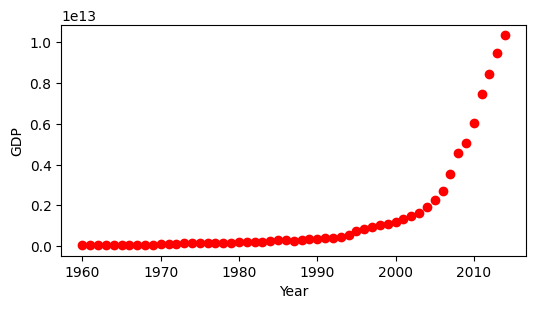

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"

df = pd.read_csv(url)

plt.figure(figsize=(6,3))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
# Normalisatsiya

X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

yhat = model.predict(X_poly)

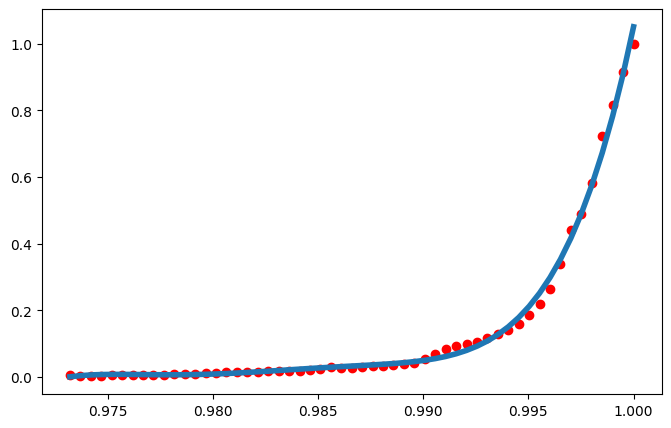

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=4.0, label='fit')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.009253921906050316


**curve_fit** yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin.

In [ ]:
# Saqlangan rasmni ochish
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:1046/1*l59BUnPwWHMf1H-GNxgZHQ.png',height=100)

# Sigmoid/ Logistic Regression formula

In [ ]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517092123388
beta2=0.9972071272529931


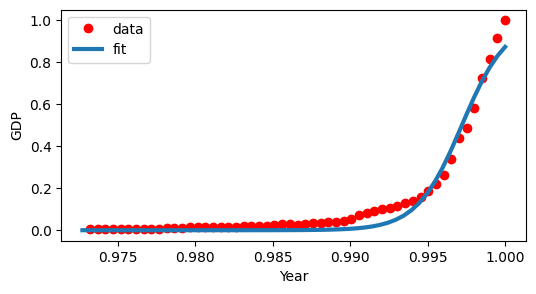

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(6,3))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.030498418823495136


**Non-Linear Regression formulas **

In [ ]:
Image(url='https://i.ytimg.com/vi/rb_IXh6aBK0/hqdefault.jpg')

## **Overfitting / Underfitting**

**Underfitting** -> Model juda sodda . Train setda ham test setda ham katta xatolik.

High bias (gumon)

**Overfitting** --> Model juda murakkab . Train setga moslashib qolgan. -> Train setda aniqlik baland (xato kam) , Test setda aniqlik juda ham past (xato ko'p)

High variance (farq)

**Yaxshi model**-> Train va Test setlarda birdek katta aniqlik

Low bias , low variance



Underfitting -> Modelni murakkablashtirish kerak.

1. Ko'proq parametrlar qo'shish
2. Polynomial darajani oshirish
3. Ko'proq qavatlar qo'shish(Deep learning)

Overfitting -> Modelni soddalashtirish kerak

1. Parametlarni kamaytirish
2. Algorithm ni o'zgartirish
3. Polynomial darajani kamaytirish
3. Ko'proq malumot yig'ish

In [ ]:
Image(url="https://miro.medium.com/v2/resize:fit:1125/1*_7OPgojau8hkiPUiHoGK_w.png", height=200)

# **Classification**

**Classification** - Nomalum elementlarni kategoriyalarga (class) larga ajratish.

Ishlatilishi:

1. MIjozlarni kategoriyalarga ajratish
2. MIjoz qaytish yoki qaytmasligi (Customer churn)
3. Biror reklama mijozga to'g'ri kelish kelmasligi(targeted marketing)
4. Objectlarni aniqlsh , ajratish
5. Yuzni tanish(Face Id)
6. Qo'l yozma va Nutqni tushunish
7. Tavsiya tizimlari

In [ ]:
from IPython.display import Image
# classification algorithms
# Image(url='https://miro.medium.com/v2/resize:fit:1200/1*R6Rbcks-pGO0SkhCINrP0g.png', height=400)

**Logistic Regression**

Afzalligi -- Ehtimollikka asoslangan, har bir parameter muhimligini ham ko'rsatadi
Kamchiligi --Ustunlar o'rtasida logistic bog'liqlikni talab qiladi

**K-NN**

Afzalligi -- Sodda, tez va samarali

Kamchiligi -- K-qiymatini to'g'ri topish kerak

**Support Vector Machine (SVM)**

Afzalligi -- Samarali, noodatiy qiymatlarga sezgir emas, overfitting oldini oladi

Kamchiligi -- Ko'p ustunli (parametrli) datasetlarga to'g'ri kelmaydi. Chiziqli bo'lmagan muammolarga tushmaydi

**Kernel SVM**

Afzalligi-- Chizigli bo'Imagan muammolar uchun

Kamchiligi-- Ko'p ustunli (parametrli) datasetlarga to 'g'ri kelmaydi.

Decision Tree

Afzalligi -- Tushunishga oson, parametrlarga ishlov berish talab qilinmaydi, chiziqli va chiziqli bo'lmagan muammolarga birdek tushadi

Kamchiligi -- Kichik datasetlarda overfitting yuzaga keladi.

Random Forest

Afzalligi -- Aniqligi baland. Turli muammolarda yaxshi natija.

Kamchiligi -- Tushunishga qiyin, tarkibidagi daraxtlar sonini aniqlash kerak, overfittinga moyil


In [ ]:
# classification algorithms
# Image(url='https://miro.medium.com/v2/resize:fit:1080/1*p71ftGT0uRExSsmqCJ6-YA.jpeg',height=500)

## **KNN** - K-nearest neighbor-> k ta eng yaqin qo'shnilar

In [ ]:
import pandas as pd
import numpy as np

url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)

In [ ]:
# Harfli qiymatlarni songa o'zgartirish uchun sklearn tarkibidagi LabelEncoder dan yoki pandas dagi .replace() metodidan foydalanish mumkin.

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
# df['diagnosis'] = df['diagnosis'].replace("M",1)
# df['diagnosis'] = df['diagnosis'].replace("B",0)
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
# df.drop(columns=['id'], inplace=True)

corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,0.012968,0.000096,0.050080,0.044158,0.022114,0.052511,0.143048,0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,0.002968,0.023203,0.035174,0.044224,0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.012968,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [ ]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

ML ga tayyorlaymiz

In [ ]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

ML

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn.predict(X_test)

## **Classificator modelini baholash.**

**Jaccard index** -> ikki to'plam orasidagi bog'liqlikni ko'rsatadi.*italicised text*

In [ ]:
Image(url='https://media.geeksforgeeks.org/wp-content/uploads/20230811131746/How-to-Calculate-Jaccard-Similarity-in-Python.png', height=100)

**Confusion matrix (Precision, Recall)**

In [ ]:
Image(url='https://www.researchgate.net/publication/370070277/figure/fig3/AS:11431281149637241@1681824354931/Confusion-matrix-and-performance-metrics-formula.png', height=200)

**Baholash**

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8775510204081632

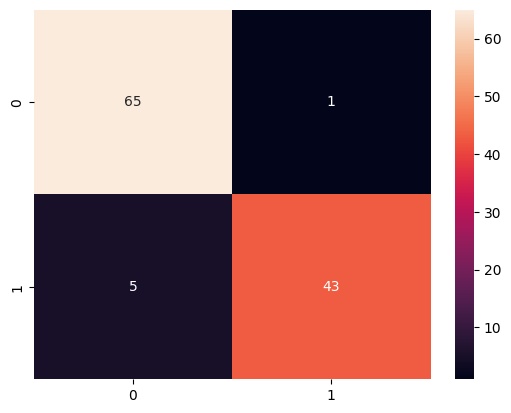

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
confusion_matrix(y_test, y_predict)

array([[65,  1],
       [ 5, 43]])

**Precision, recall, F1**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.9772727272727273
recall=0.8958333333333334
f1=0.9347826086956522
accuracy=0.9473684210526315


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        66
           1       0.98      0.90      0.93        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



**Cross-validation yordamida tekshiramiz**

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       357
           1       0.98      0.93      0.95       212

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569



**Eng yaxshi k ni topish**

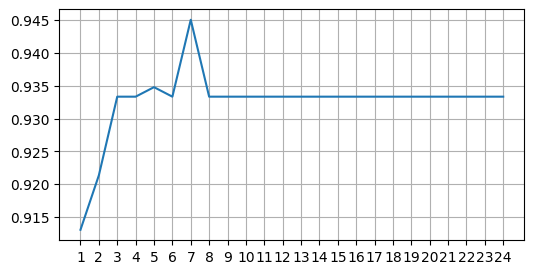

In [ ]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(6,3))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

**Grid Search yordamida**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 13,  6,  2,  3,  9,  1,  4,  7, 10,  4, 10,  8, 14, 12,
       18, 20, 18, 16, 20, 17, 20], dtype=int32)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [ ]:
knn_gscv.best_score_

0.968390001552554

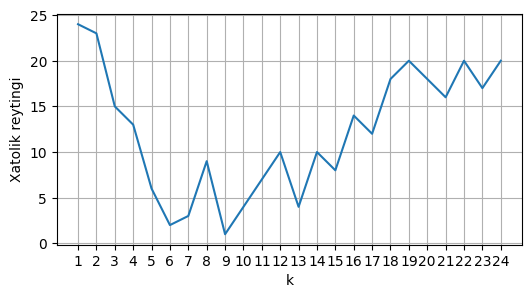

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

## Decision Tree

1. Datasetdagi biror ustunni tanlaymiz
2. Malumotlarni bo'lishda ustun muhimligini aniqlaymiz
3. Eng yaxshi ustun bo'yicha malumotlarni bo'lamiz
4. Qadamlarni takrorlash

In [ ]:
# Entropia ni hisoblash formulasi . Entropia qancha kichik bo'lsa shuncha yaxshi
Image(url='https://www.researchgate.net/publication/372233393/figure/fig9/AS:11431281173487072@1688949412713/Figura-1-Formula-de-la-entropia-de-la-Teoria-Matematica-de-la-Informacion-de-Shannon.png')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [ ]:
# Matnli ustunlarga ishlov
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)

In [ ]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values

y = df['Drug'].values

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [ ]:
# Model

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Baholash

y_predict = tree_model.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


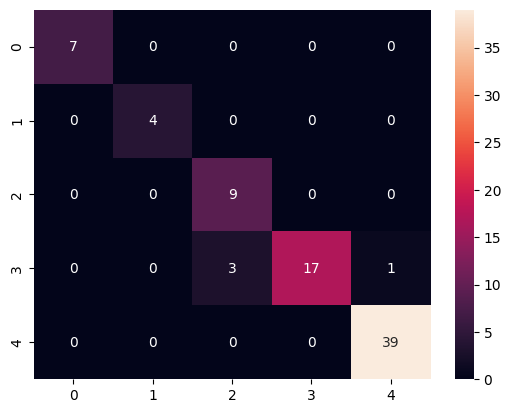

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
# Cross Validation

predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



Decision Tree chizamiz

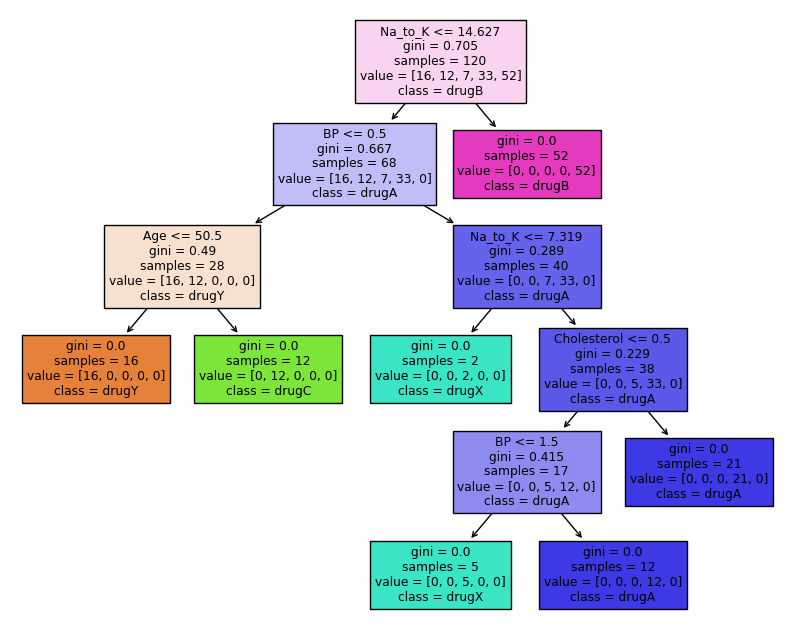

In [ ]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(10,8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

## **Hyperparameters**

Har bir model o'ziga xos **giperparametrlar** bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin.

k-NN uchun bu k ya'ni qo'shnilar soni edi. Decision Treen da esa bir nechta giperparametrlar mavjud.

Barcha parametrlarni ushbu link orqali ko'rishingiz mumkin: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**`min_impurity_decrease'** - natija qanchalik "toza" bo'lishini belgilaydi. **Standart qiymati 0**

DecisionTrees's Accuracy:  0.95


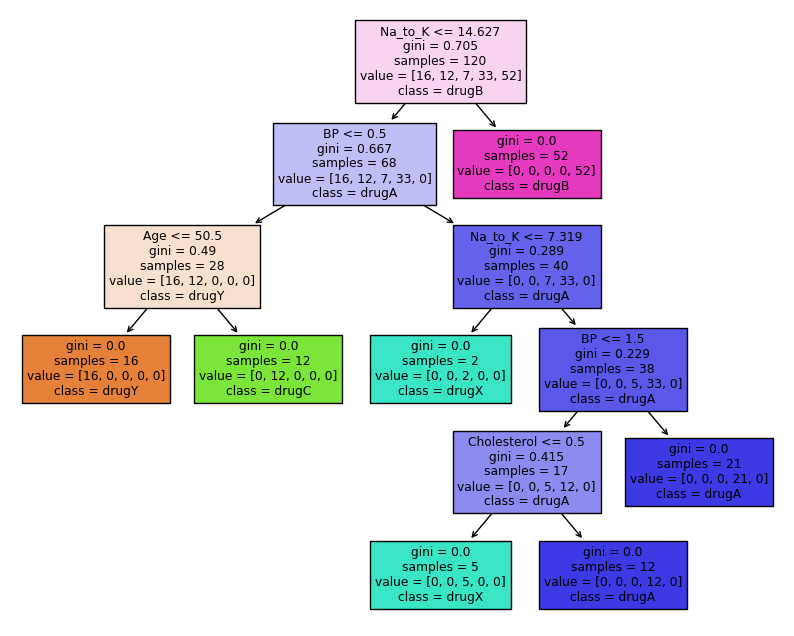

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01) # Qanchagacha aniqlikda hisoblash
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**max_depth** - shajara qavatlari soni

DecisionTrees's Accuracy:  0.8375


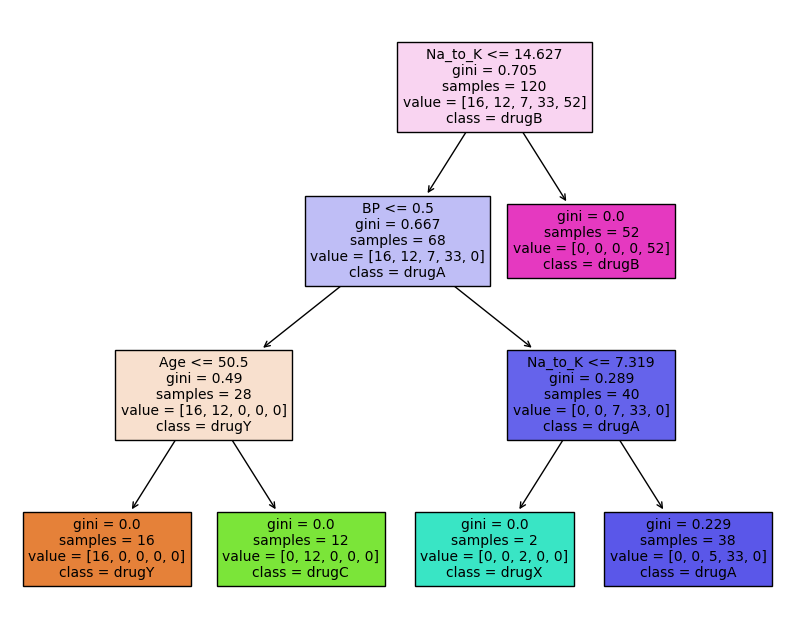

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**min_samples_leaf** - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

DecisionTrees's Accuracy:  0.875


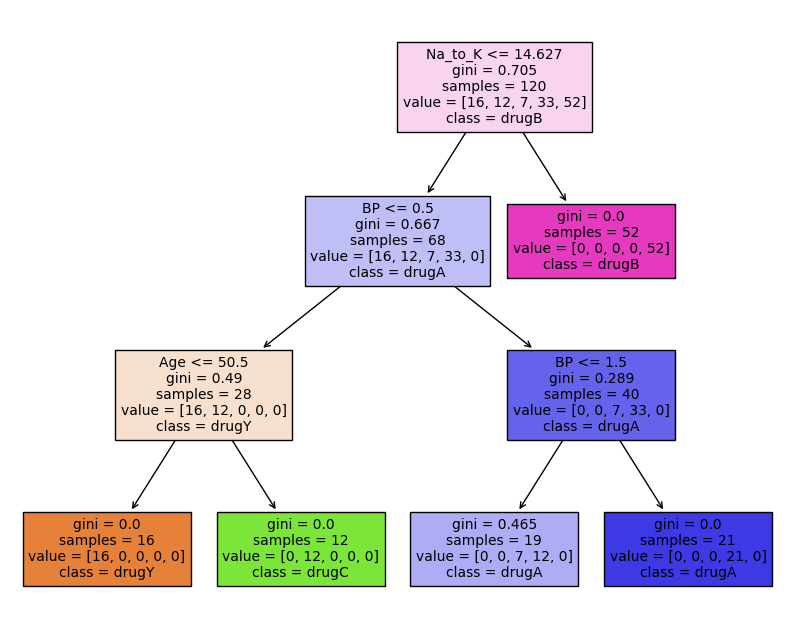

In [ ]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,8))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**Random Forest**

**n_estimators** - o'rmondagi daraxtlar soni.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9875


**Logistic Regression** -> Classification model -> asosan Binary Classification uchun ishlatladi.